In [2]:
# here, I will decompose the time series to analyze the trend, seasonal, and residual components

In [4]:
import pandas as pd

#loading the preprocessed dataset
cleaned_data_path = '../data/cleaned_household_power_consumption.csv'
df = pd.read_csv(cleaned_data_path, parse_dates=['DateTime'], index_col='DateTime')

df.head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


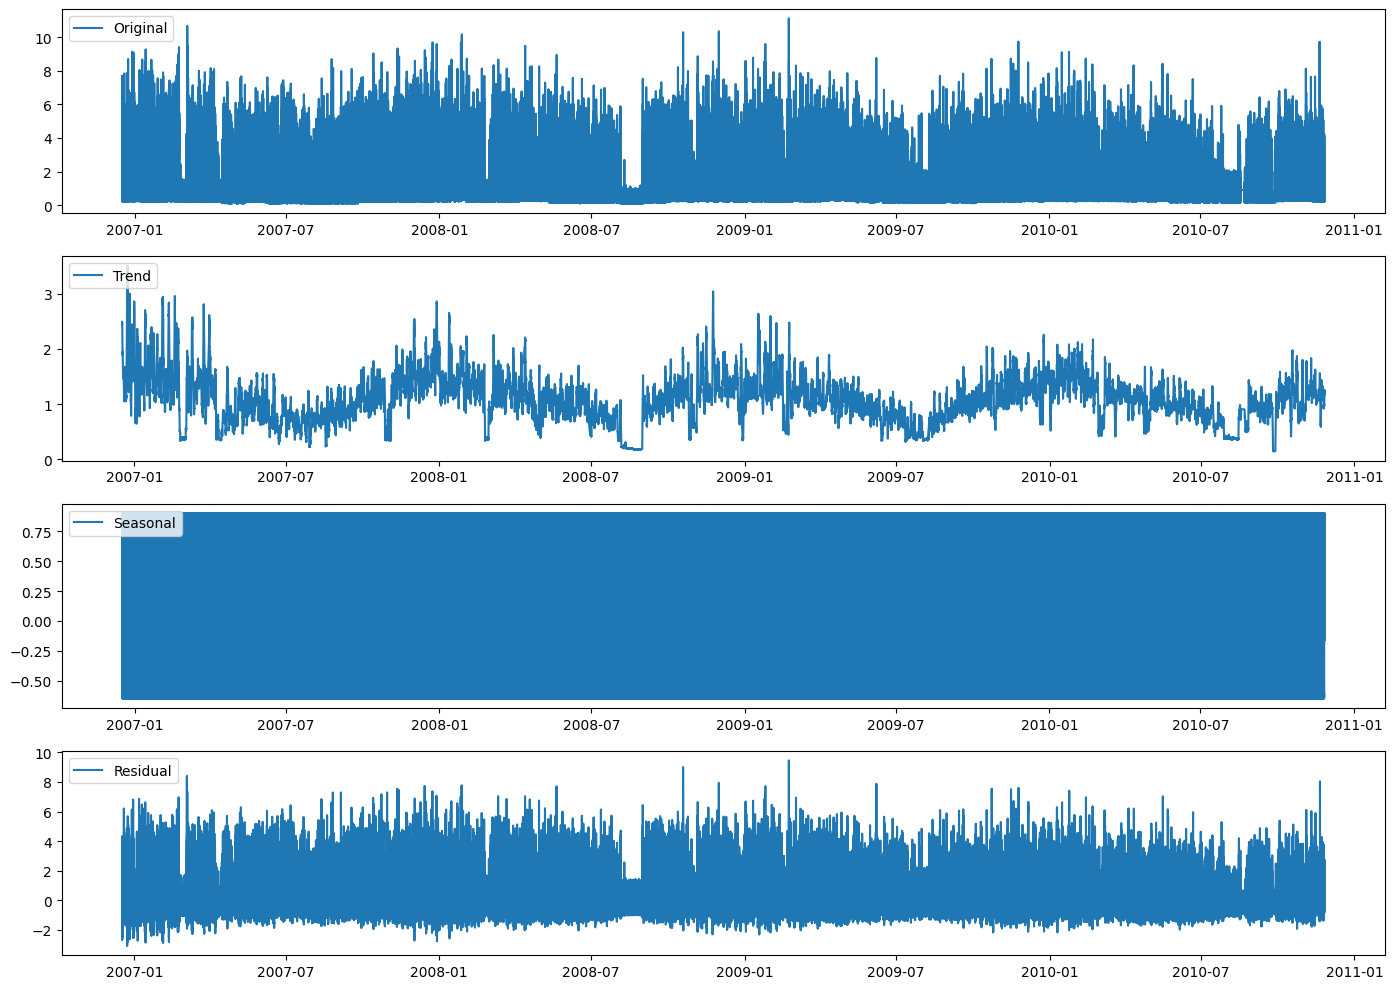

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# "Global_active_power" column for decomposition
series = df['Global_active_power']

# performing seasonal decomposition with daily seasonality 
# note: I've set to frequency=1440 for minute-level data
decomposition = seasonal_decompose(series, model='additive', period=1440)

# The "period" parameter represents the number of time units in a single seasonal cycle. 
# for example, if you have daily data, the period would be 7 to capture the weekly seasonality. 
# if you have hourly data, the period would be 24 to capture the daily seasonality.
# in our case, where you have minute-level data and have set the period to 1440

# plotting the decomposed components
plt.figure(figsize=(14, 10))
plt.subplot(4, 1, 1)
plt.plot(series, label='Original')
plt.legend(loc='upper left')
plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
# some insights i noticed:
# in TREND: 
    # there’s a notable dip around mid-2008, followed by a rise and another dip in late 2009. 
    # This could indicate seasonal shifts, changes in household routines, or even economic factors affecting power consumption.
# in SEASONALITY:
    # the plot seems to show a flat or constant seasonal component

In [7]:
# we can save trend, seasonal, and residual components to a DataFrame
decomposition_df = pd.DataFrame({
    'trend': decomposition.trend,
    'seasonal': decomposition.seasonal,
    'residual': decomposition.resid,
    'observed': series
})

# and then saving it into CSV
decomposition_df.dropna(inplace=True)  # Droping null values rows from trend/residual
decomposition_df.to_csv('../data/decomposition_results.csv')